In [1]:
import random
import subprocess
import os
import matplotlib.pyplot as plt
import numpy as np

In [66]:
# Generate N random numbers without repetition
# Use a Linear Congruential Generator

def random_range(start, stop=None, step=None):
    import random, math
    # Set a default values the same way "range" does.
    if stop is None: start, stop = 0, start
    if step is None: step = 1
    # Use a mapping to convert a standard range into the desired range.
    mapping = lambda i: (i*step) + start
    # Compute the number of numbers in this range.
    maximum = (stop - start) // step
    # Seed range with a random integer.
    value = random.randint(0,maximum)
    #
    # Construct an offset, multiplier, and modulus for a linear
    # congruential generator. These generators are cyclic and
    # non-repeating when they maintain the properties:
    #
    #   1) "modulus" and "offset" are relatively prime.
    #   2) ["multiplier" - 1] is divisible by all prime factors of "modulus".
    #   3) ["multiplier" - 1] is divisible by 4 if "modulus" is divisible by 4.
    #
    offset = random.randint(0,maximum) * 2 + 1      # Pick a random odd-valued offset.
    multiplier = 4*(maximum//4) + 1                 # Pick a multiplier 1 greater than a multiple of 4.
    modulus = int(2**math.ceil(math.log2(maximum))) # Pick a modulus just big enough to generate all numbers (power of 2).
    # Track how many random numbers have been returned.
    found = 0
    while found < maximum:
        # If this is a valid value, yield it in generator fashion.
        if value < maximum:
            found += 1
            yield mapping(value)
        # Calculate the next value in the sequence.
        value = (value*multiplier + offset) % modulus

def random_range_subset(n, f):
    random_list = list(random_range(n * f))
    return random.sample(random_list, n)


# Experiment 1

In [11]:
N = 10000000
factor = 10
threads = 8
degree = 32
file = "output.txt"
ordered = 0 # 0 random 1 ordered 2 ordered reversed

In [84]:
# write to output.txt file
with open(f'../{file}', 'w') as f:
    for i in random_range_subset(N, factor):
        f.write(str(i) + '\n')

In [12]:
def run_experiment_1():
    # run the program
    os.chdir('../')
    process = subprocess.run(["./test.sh", str(1), file, str(threads), str(degree), str(ordered)], capture_output=True)
    os.chdir('./analysis')
    # capture the output
    output = process.stdout.decode('utf-8')
    # save each line to a list and convert to int
    result = [int(line) for line in output.splitlines()]
    return result


In [13]:
# for each output_list get the mean of each index and append to a list
total_output = []
for _ in range(10):
    output_list = run_experiment_1()
    total_output.append(output_list)

In [19]:
total_output_mean = []
for i in range(len(total_output[0])):
    total_output_mean.append(np.median([output_list[i] for output_list in total_output]))

In [15]:
output_value_list = [i for i in range(1000, N + 1000, 1000)]

Text(0.5, 1.0, 'Time vs Index inserted (reversed)')

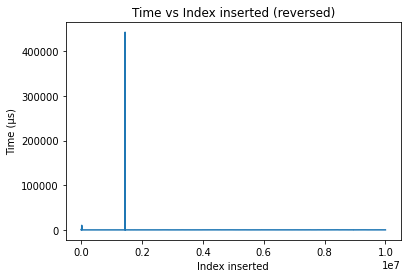

In [20]:
plt.plot(output_value_list, total_output_mean)
plt.xlabel('Index inserted')
plt.ylabel('Time (μs)')
plt.title('Time vs Index inserted (reversed)')


Text(0.5, 1.0, 'Time vs Index inserted (reversed)')

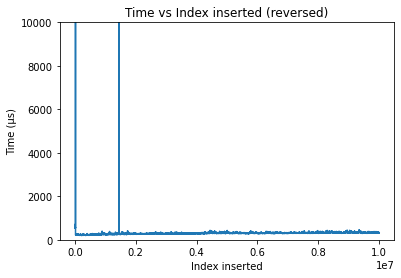

In [21]:
plt.ylim(top=10000)
plt.plot(output_value_list, total_output_mean)
plt.xlabel('Index inserted')
plt.ylabel('Time (μs)')
plt.title('Time vs Index inserted (reversed)')


Text(0.5, 1.0, 'Time vs Index inserted (reversed)')

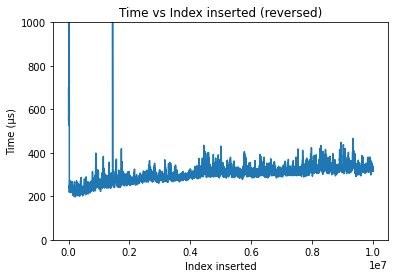

In [22]:
plt.ylim(top=1000)
plt.plot(output_value_list, total_output_mean)
plt.xlabel('Index inserted')
plt.ylabel('Time (μs)')
plt.title('Time vs Index inserted (reversed)')


# Experiment 2

In [209]:
# Experiment 2
N = 10000000
factor = 10
threads = 8
degree = 32
file = "output.txt"
ordered = 0  # does not matter

In [ ]:
# write to output.txt file
with open(f'../{file}', 'w') as f:
    for i in random_range_subset(N, factor):
        f.write(str(i) + '\n')

In [222]:
def run_experiment_2():
    # run the program
    os.chdir('../')
    process = subprocess.run(["./test.sh", str(2), file, str(threads), str(degree), str(ordered)], capture_output=True)
    os.chdir('./analysis')
    # capture the output
    output = process.stdout.decode('utf-8')
    # save each line to a list and convert to int
    result = [int(line) for line in output.splitlines()]
    return result


In [223]:
# for each output_list get the mean of each index and append to a list
total_output = []
for _ in range(10):
    output_list = run_experiment_2()
    total_output.append(output_list)

In [224]:
total_output_proc = []
for i in range(len(total_output[0])):
    temp = []
    for output_list in total_output:
        temp.append(output_list[i])
    total_output_proc.append(temp)

Text(0.5, 1.0, 'Time vs Index searches (random)')

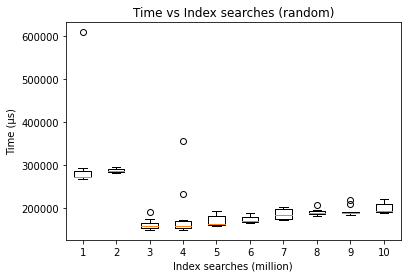

In [226]:
# Boxplots containing all the outputs with x axis of output_value_list with scientific notation
plt.boxplot(total_output_proc)
plt.xlabel('Index searches (million)')
plt.ylabel('Time (μs)')
plt.title('Time vs Index searches (random)')


# Experiment 3

In [268]:
# Experiment 2
N = 10000000
factor = 10
threads = 8
degree = 32
file = "output.txt"
ordered = 0  # does not matter


In [ ]:
# write to output.txt file
with open(f'../{file}', 'w') as f:
    for i in random_range_subset(N, factor):
        f.write(str(i) + '\n')


In [290]:
def run_experiment_4(th):
    # run the program
    os.chdir('../')
    process = subprocess.run(["./test.sh", str(4), file, str(th), str(degree), str(ordered)], capture_output=True)
    os.chdir('./analysis')
    # capture the output
    output = process.stdout.decode('utf-8')
    # save each line to a list and convert to int
    result = [int(line) for line in output.splitlines()]
    return result[0]


In [301]:
# for each output_list get the mean of each index and append to a list
total_output = []
for i in range(threads * 2):
    total_output.append(run_experiment_4(i))


Text(0.5, 1.0, 'Time vs Threads used in search (random)')

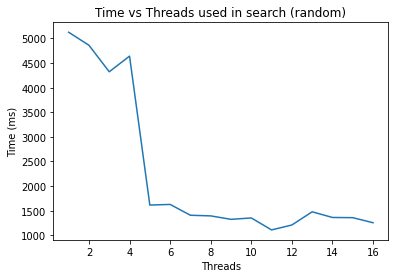

In [303]:
plt.plot([i + 1 for i in range(threads * 2)], total_output)
plt.xlabel('Threads')
plt.ylabel('Time (ms)')
plt.title('Time vs Threads used in search (random)')


Text(0.5, 1.0, 'Time vs Index deletes (random)')

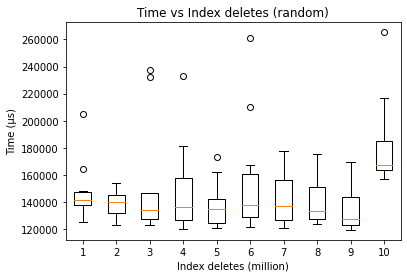

In [261]:
# Boxplots containing all the outputs with x axis of output_value_list with scientific notation
plt.boxplot(total_output_proc)
plt.xlabel('Index deletes (million)')
plt.ylabel('Time (μs)')
plt.title('Time vs Index deletes (random)')


# Experiment 4

In [ ]:
# Experiment 2
N = 10000000
factor = 10
threads = 8
degree = 32
file = "output.txt"
ordered = 0  # does not matter


In [ ]:
# write to output.txt file
with open(f'../{file}', 'w') as f:
    for i in random_range_subset(N, factor):
        f.write(str(i) + '\n')


In [ ]:
def run_experiment_3():
    # run the program
    os.chdir('../')
    process = subprocess.run(["./test.sh", str(3), file, str(threads), str(degree), str(ordered)], capture_output=True)
    os.chdir('./analysis')
    # capture the output
    output = process.stdout.decode('utf-8')
    # save each line to a list and convert to int
    result = [int(line) for line in output.splitlines()]
    return result
